In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/home/tarciso/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Reading Data

In [61]:
#bus_data = pd.read_csv("./testData/part-00001-fb1b9f0f-916d-4da3-9018-1709bb6aed6c.csv")
bus_data = pd.read_csv("/local/tarciso/sample-exp/preproc-output/part-00000-2d3fae33-6461-49e1-b516-ab92209a4e1c.csv")

/home/tarciso/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
bus_data.head()

,route,tripNumOrig,shapeId,shapeSequence,shapeLatOrig,shapeLonOrig,distanceTraveledShapeOrig,busCode,gpsPointId,gpsLat,...,isRushDest,periodOrig,periodDest,weekDay,weekOfYear,dayOfMonth,month,isHoliday,isWeekend,isRegularDay
0,010,14.0,1708,5859310,-25.410429,-49.276548,537.974,BB001,NaN,NaN,...,0,night,night,Wed,19,10,5,0,0,1
1,010,14.0,1708,5859334,-25.411635,-49.270879,1141.061,BB001,NaN,NaN,...,0,night,night,Wed,19,10,5,0,0,1
2,010,14.0,1708,5859363,-25.415253,-49.270136,1624.751,BB001,NaN,NaN,...,0,night,night,Wed,19,10,5,0,0,1
3,010,14.0,1708,5859398,-25.416614,-49.267884,1972.077,BB001,NaN,-25.41671,...,0,night,night,Wed,19,10,5,0,0,1
4,010,14.0,1708,5859421,-25.414112,-49.265981,2378.349,BB001,NaN,NaN,...,0,night,night,Wed,19,10,5,0,0,1


In [63]:
bus_data.describe(include='all')

,route,tripNumOrig,shapeId,shapeSequence,shapeLatOrig,shapeLonOrig,distanceTraveledShapeOrig,busCode,gpsPointId,gpsLat,...,isRushDest,periodOrig,periodDest,weekDay,weekOfYear,dayOfMonth,month,isHoliday,isWeekend,isRegularDay
count,20320,19901.000000,20320.000000,2.032000e+04,20320.000000,20320.000000,20320.000000,19497,0.0,13427.000000,...,20320.000000,20320,20320,20320,20320.000000,20320.000000,20320.0,20320.0,20320.000000,20320.000000
unique,303,NaN,NaN,NaN,NaN,NaN,NaN,541,NaN,NaN,...,NaN,3,3,7,NaN,NaN,NaN,NaN,NaN,NaN
top,040,NaN,NaN,NaN,NaN,NaN,NaN,HA020,NaN,NaN,...,NaN,morning,morning,Thu,NaN,NaN,NaN,NaN,NaN,NaN
freq,491,NaN,NaN,NaN,NaN,NaN,NaN,164,NaN,NaN,...,NaN,7651,7619,5592,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.684589,2371.528051,5.689901e+06,-25.461617,-49.279083,6126.020962,NaN,NaN,-25.461068,...,0.360187,NaN,NaN,NaN,19.411122,13.814715,5.0,0.0,0.185039,0.583465
std,NaN,6.040222,635.713168,9.119022e+05,0.050027,0.040306,5328.595185,NaN,NaN,0.049309,...,0.480066,NaN,NaN,NaN,0.492049,2.851936,0.0,0.0,0.388339,0.492997
min,NaN,1.000000,1708.000000,3.283077e+06,-25.601552,-49.376695,0.000000,NaN,NaN,-25.597821,...,0.000000,NaN,NaN,NaN,19.000000,10.000000,5.0,0.0,0.000000,0.000000
25%,NaN,3.000000,1894.000000,5.255210e+06,-25.495646,-49.308509,2376.221000,NaN,NaN,-25.495407,...,0.000000,NaN,NaN,NaN,19.000000,11.000000,5.0,0.0,0.000000,0.000000
50%,NaN,6.000000,2119.000000,6.063994e+06,-25.455773,-49.276624,4824.068000,NaN,NaN,-25.455790,...,0.000000,NaN,NaN,NaN,19.000000,13.000000,5.0,0.0,0.000000,1.000000
75%,NaN,11.000000,2837.000000,6.346164e+06,-25.426278,-49.249347,8229.424750,NaN,NaN,-25.426042,...,1.000000,NaN,NaN,NaN,20.000000,16.000000,5.0,0.0,0.000000,1.000000


In [64]:
bus_data.columns

Index([u'route', u'tripNumOrig', u'shapeId', u'shapeSequence', u'shapeLatOrig',
       u'shapeLonOrig', u'distanceTraveledShapeOrig', u'busCode',
       u'gpsPointId', u'gpsLat', u'gpsLon', u'distanceToShapePoint',
       u'timestampOrig', u'busStopIdOrig', u'problem', u'numPassengers',
       u'date', u'busStopIdDest', u'timestampDest', u'tripNumDest',
       u'shapeLatDest', u'shapeLonDest', u'distanceTraveledShapeDest',
       u'acumPassengers', u'probableNumPassengers', u'duration', u'distance',
       u'hourOrig', u'hourDest', u'isRushOrig', u'isRushDest', u'periodOrig',
       u'periodDest', u'weekDay', u'weekOfYear', u'dayOfMonth', u'month',
       u'isHoliday', u'isWeekend', u'isRegularDay'],
      dtype='object')

### Number of stops per route

In [65]:
stops_per_route = bus_data.drop_duplicates(subset=['route','busStopIdOrig']).groupby('route')['route'].count().to_frame(name='num_stops').reset_index()

In [66]:
stops_per_route.head()

,route,num_stops
0,22,15
1,30,81
2,40,60
3,50,49
4,150,40


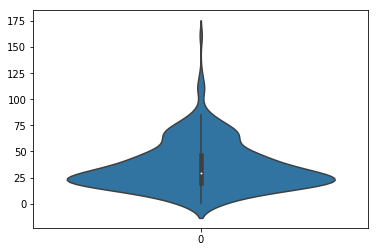

In [67]:
sns.violinplot(data=stops_per_route['num_stops'])

### Number of passengers per route

In [72]:
passengers_per_route = bus_data.groupby('route')['numPassengers'].agg(['max','min','median','mean'])
passengers_per_route.head()

,max,min,median,mean
route,,,,
22,0.0,0.0,0.0,0.000000
30,NaN,NaN,NaN,NaN
40,4.0,0.0,0.0,0.186441
50,3.0,0.0,0.0,0.333333
150,3.0,0.0,0.0,0.200000


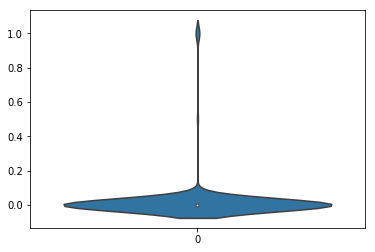

In [73]:
sns.violinplot(data=passengers_per_route['median'])

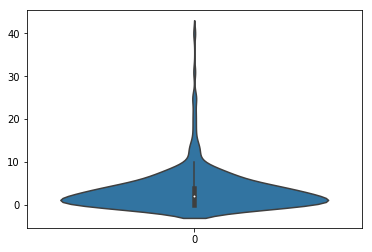

In [74]:
sns.violinplot(data=passengers_per_route['max'])

### Number of passengers per hour

In [81]:
passengers_per_route = bus_data.groupby(['route','hourOrig'])[['route','hourOrig']].count()

In [82]:
passengers_per_route.head()

route  hourOrig
route hourOrig                 
22    6.0           9         9
      7.0           6         6
40    15.0         30        30
      16.0         29        29
      19.0          1         1

In [ ]:
#Try pandas transform